# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.


# Install detectron2

In [79]:
!which python
!which pip
!which python3
!which pip3
!python -m pip install torch torchvision opencv-python numpy pyyaml == 5.1
import sys, os, distutils.core
from PIL import Image

# Properly install detectron2.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

/opt/homebrew/anaconda3/bin/python
/opt/homebrew/anaconda3/bin/pip
/opt/homebrew/anaconda3/bin/python3
/opt/homebrew/anaconda3/bin/pip3
zsh:1: = not found
  Cloning https://github.com/facebookresearch/detectron2.git to /private/var/folders/tl/7gn9wfpd1r1dy2sh952d56z80000gn/T/pip-req-build-6uci1980
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /private/var/folders/tl/7gn9wfpd1r1dy2sh952d56z80000gn/T/pip-req-build-6uci1980
  Resolved https://github.com/facebookresearch/detectron2.git to commit 017abbfa5f2c2a2afa045200c2af9ccf2fc6227f
  Preparing metadata (setup.py) ... done


In [80]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

zsh:1: command not found: nvcc
torch:  2.1 ; cuda:  2.1.1
detectron2: 0.6


In [81]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from matplotlib import pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog


def show_image(img):
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

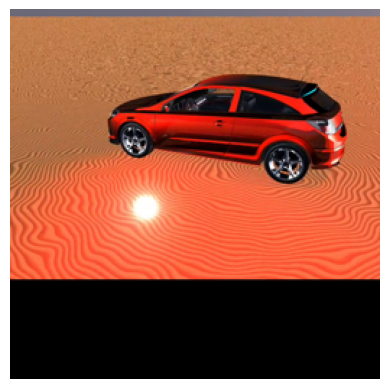

In [82]:
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread(
    "./carseg_data/images/orange_3_doors/no_segmentation/0002.png")[:, :, ::-1]
im = np.load("./carseg_data/arrays_v2/orange_3_doors_0100.npy")[:, :, :3]
show_image(im)

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [83]:
cfg = get_cfg()
# Use CPU
cfg.MODEL.DEVICE = 'cpu'
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im[:, :, ::-1])

[11/20 10:57:06 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


In [84]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)
print(outputs["instances"].pred_masks.shape)

tensor([2])
Boxes(tensor([[ 65.3601,  46.8605, 232.5767, 120.5368]]))
torch.Size([1, 256, 256])


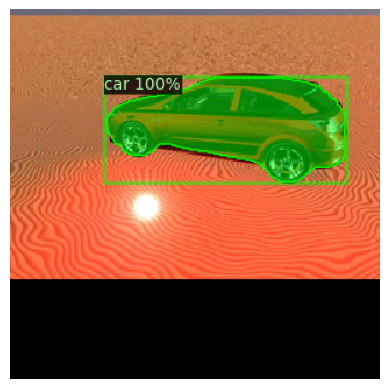

NameError: name 'Image' is not defined

In [92]:
v = Visualizer(im, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
show_image(out.get_image())
im = Image.fromarray(out.get_image())
im.save("test.jpg")

In [87]:
masks = outputs["instances"].pred_masks
mask = np.any(masks.numpy(), axis=0)
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [93]:
binary_array = np.array([[[True, False, False],
                          [False, True, False],
                          [False, False, True]],
                         [[False, False, True],
                          [False, True, False],
                          [True, False, False]]])

mask = np.any(binary_array, axis=0)
mask
# binary_array.shape

array([[ True, False,  True],
       [False,  True, False],
       [ True, False,  True]])